<a href="https://colab.research.google.com/github/tinemyumi/saude-mental-datasus/blob/main/notebooks/7_eda_pre_pos_pandemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório**

## **Conteúdo**
- 1.1. Visão Geral
- 1.2. Panorama Geral
- 1.3. Análise Temporal
- 1.4. Perfil Sociodemográfico
- 1.5. Diagnóstico
- 1.6. Análise Geográfica
- 1.7. Óbito

## **Histórico de Alterações**
- **Data:** 06/02/2026 | **Autor:** Larissa Tinem | Visão geral, panorama geral, análise temporal
- **Data:** 08/02/2026 | **Autor:** Larissa Tinem | Perfil sociodemográfico, diagnóstico
- **Data:** 09/02/2026 | **Autor:** Larissa Tinem | Análise geográfica, óbito

# **1. Análise Exploratória - Período Completo (Pré, Durante e Pós Pandemia)**

## **Objetivo**

Compreender diferenças das internações entre os períodos da pandemia.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## **1.1. Criando o DataFrame**

In [ ]:
# Carregar os arquivos
df_pre = pd.read_parquet('/content/drive/MyDrive/Dataframes/df_sih_sus_sem_tratamento/saude_mental_pre_pandemia.parquet')
df_pan = pd.read_parquet('/content/drive/MyDrive/Dataframes/df_sih_sus_sem_tratamento/saude_mental_pandemia.parquet')
df_pos = pd.read_parquet('/content/drive/MyDrive/Dataframes/df_sih_sus_sem_tratamento/saude_mental_pos_pandemia.parquet')

# Criar a coluna de período para facilitar a comparação posterior
df_pre['periodo'] = 'Pre-Pandemia'
df_pan['periodo'] = 'Pandemia'
df_pos['periodo'] = 'Pos-Pandemia'

# Unir tudo em um único DataFrame
df_total = pd.concat([df_pre, df_pan, df_pos], ignore_index=True)

del df_pre, df_pan, df_pos

In [ ]:
# Visualizando as 5 primeiras linhas
df_total.head()

,UF_ZI,ANO_CMPT,MES_CMPT,NASC,IDADE,SEXO,RACA_COR,ESPEC,IDENT,MUNIC_RES,...,MUNIC_MOV,CID_ASSO,CID_MORTE,COMPLEX,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM,MORTE,periodo
0,353650,2014,1,1971-10-03,42,1,99,03,1,353650,...,353650,,,02,2013-11-02,2013-11-04,2,2,0,Pre-Pandemia
1,353650,2014,1,1985-11-15,28,1,99,03,1,353650,...,353650,,,02,2013-12-27,2013-12-29,2,2,0,Pre-Pandemia
2,353650,2014,1,1983-08-07,30,1,99,03,1,353650,...,353650,,,02,2013-12-30,2014-01-01,2,2,0,Pre-Pandemia
3,353650,2014,1,1941-01-24,72,1,99,03,1,353650,...,353650,,,02,2013-12-29,2013-12-31,2,2,0,Pre-Pandemia
4,353650,2014,1,1990-03-08,23,1,99,03,1,353650,...,353650,,,02,2013-12-22,2013-12-24,2,2,0,Pre-Pandemia


In [ ]:
# Quantidade de linhas e colunas
print(df_total.shape)

(1135769, 24)


In [ ]:
# Colunas
print('COLUNAS: ', df_total.columns)
print('-'*80)

# Informações sobre o dataset
print('INFORMAÇÕES: ')
print(df_total.dtypes)

COLUNAS:  Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'NASC', 'IDADE', 'SEXO', 'RACA_COR',
       'ESPEC', 'IDENT', 'MUNIC_RES', 'DIAG_PRINC', 'DIAG_SECUN', 'CAR_INT',
       'COBRANCA', 'MUNIC_MOV', 'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'DT_INTER',
       'DT_SAIDA', 'QT_DIARIAS', 'DIAS_PERM', 'MORTE', 'periodo'],
      dtype='object')
--------------------------------------------------------------------------------
INFORMAÇÕES: 
UF_ZI                 object
ANO_CMPT               int64
MES_CMPT               int64
NASC          datetime64[ns]
IDADE                  int64
SEXO                  object
RACA_COR              object
ESPEC                 object
IDENT                 object
MUNIC_RES             object
DIAG_PRINC            object
DIAG_SECUN            object
CAR_INT               object
COBRANCA              object
MUNIC_MOV             object
CID_ASSO              object
CID_MORTE             object
COMPLEX               object
DT_INTER      datetime64[ns]
DT_SAIDA      datetim

In [ ]:
# Verificando valores nulos
df_total.isnull().sum()

,0
UF_ZI,0
ANO_CMPT,0
MES_CMPT,0
NASC,0
IDADE,0
SEXO,0
RACA_COR,0
ESPEC,0
IDENT,0
MUNIC_RES,0


In [ ]:
print('Ano Mínimo: ', df_total['ANO_CMPT'].min())
print('Ano Máximo: ', df_total['ANO_CMPT'].max())

Ano Mínimo:  2014
Ano Máximo:  2024


## **1.2. Panorama Geral**

### **1.2.1. Número total de internações**

**Análise Inicial**

- **Quantidade total de linhas:** 1.135.769
- **Quantidade total de internações:** 1.112.933
- **Diferença:** 22.836

A base apresentou aproximadamente 2,01% de registros duplicados, associados a reprocessamentos administrativos, os quais foram removidos para evitar superestimação do número de internações.



In [ ]:
# Identificando ~evento~ de uma internação
chave_internacao = [
    'UF_ZI',
    'ANO_CMPT',
    'MUNIC_RES',
    'DT_INTER',
    'DT_SAIDA',
    'DIAG_PRINC',
    'SEXO',
    'IDADE',
    'MORTE'
]

# Elimina duplicatas de acordo com o evento de internação
df_tratado = df_total.drop_duplicates(subset=chave_internacao)

# Conta o total de internações
total_internacoes = df_tratado.shape[0]
print('Número total de linhas: ', df_total.shape[0])
print('Número total de internações: ', total_internacoes)
print('Diferença: ', df_total.shape[0] - df_tratado.shape[0])


Número total de linhas:  1135769
Número total de internações:  1112933
Diferença:  22836


### **1.2.2. Média Mensal de Internações**

**Análise Inicial**

Antes da pandemia, a média mensal de internações era significativamente maior (≈9.613), indicando um padrão mais estável e elevado de utilização dos serviços.
Durante a pandemia, houve uma queda acentuada (≈6.629), possivelmente associada à redução de atendimentos eletivos e restrições de acesso.
No pós-pandemia, observa-se recuperação parcial (≈7.591), mas ainda abaixo do nível pré-pandêmico.
Isso sugere que o sistema não retomou totalmente o patamar anterior.



In [ ]:
df_tratado = df_tratado.copy()

df_tratado['ano_mes'] = (
    df_tratado['ANO_CMPT'].astype(str)
    + '-'
    + df_tratado['MES_CMPT'].astype(str).str.zfill(2)
)


# Ordem cronológica correta
ordem_cronologica = ['Pre-Pandemia', 'Pandemia', 'Pos-Pandemia']

# Transforma a coluna 'periodo' em categoria com ordem definida
df_tratado['periodo'] = pd.Categorical(df_tratado['periodo'], categories=ordem_cronologica, ordered=True)

# 3. Contar o total de casos por mês/ano dentro de cada período
contagem_por_mes = df_tratado.groupby(['periodo', 'ano_mes'], observed=True).size().reset_index(name='total_do_mes')

# 4. Calcular a média mensal por período
# O pandas agora respeitará a ordem que definimos no passo 2
media_mensal_periodo = contagem_por_mes.groupby('periodo', observed=True)['total_do_mes'].mean()

print("Média Mensal de Internações por Período (Ordenado):")
print(media_mensal_periodo)

Média Mensal de Internações por Período (Ordenado):
periodo
Pre-Pandemia    9612.625000
Pandemia        6628.666667
Pos-Pandemia    7591.333333
Name: total_do_mes, dtype: float64


### **1.2.3. Quantidade de municípios residente e de internação**

**Análise Inicial**

Há 1.247 municípios de residência, mas apenas 333 concentram as internações.
Isso indica forte centralização da oferta hospitalar em um número reduzido de cidades.
Muitos municípios dependem de deslocamento para atendimento.
O dado sugere possível desigualdade regional no acesso aos serviços.
Vale analisar fluxo de evasão para identificar polos sobrecarregados.

In [ ]:
qtde_munic_res = df_tratado['MUNIC_RES'].nunique()
print('Quantidade de município de residência: ', qtde_munic_res)

qtde_munic_int = df_tratado['MUNIC_MOV'].nunique()
print('Quantidade de municípios de internação: ', qtde_munic_int)

Quantidade de município de residência:  1247
Quantidade de municípios de internação:  333


## 1.3. **Análise Temporal**

### **1.3.1. Evolução Anual das Internações**

**Análise Inicial**

O gráfico mostra queda nas internações por saúde mental de 2014 até 2018, com pequena oscilação em 2019. Em 2020 e 2021, período da pandemia, há uma redução mais acentuada. Isso pode estar ligado às restrições, medo de procurar hospitais e reorganização dos serviços de saúde. A partir de 2022, observa-se retomada gradual das internações. Mesmo assim, os números ainda permanecem abaixo do início da série histórica.

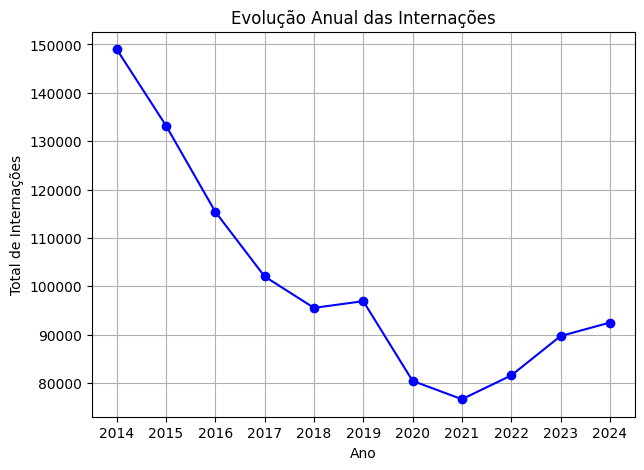

In [ ]:
internacoes_anuais = (
    df_tratado
    .groupby('ANO_CMPT')
    .size()
    .reset_index(name='qtde_internacoes')
)

plt.figure(figsize=(7,5))
plt.plot(
    internacoes_anuais['ANO_CMPT'],
    internacoes_anuais['qtde_internacoes'],
    marker='o',
    color='blue'
)
plt.title('Evolução Anual das Internações')
plt.xlabel('Ano')
plt.ylabel('Total de Internações')
plt.xticks(internacoes_anuais['ANO_CMPT'])
plt.grid(True)
plt.show()

### **1.3.2. Média Mensal de Internações Por Período**

**Análise Inicial**

O gráfico mostra que a média mensal de internações era bem mais alta no período pré-pandemia. Durante a pandemia, há uma queda expressiva na média.
No pós-pandemia, observa-se uma leve recuperação em relação ao período pandêmico. Mesmo assim, os valores continuam bem abaixo do cenário anterior à pandemia. Isso reforça o impacto significativo da pandemia na dinâmica das internações em saúde mental.

/tmp/ipython-input-1521426120.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'ANO_CMPT', 'MES_CMPT'])
/tmp/ipython-input-1521426120.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0)


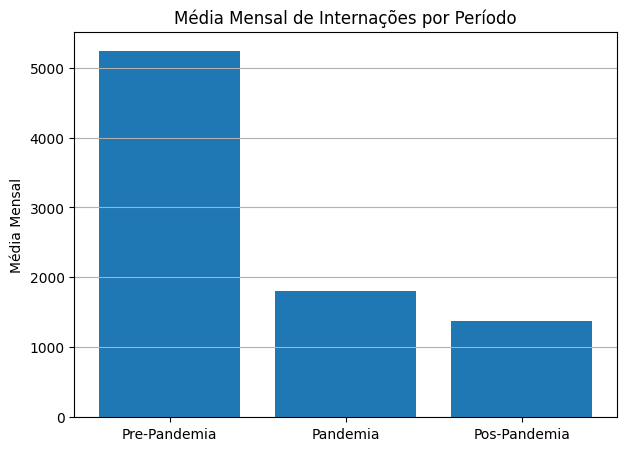

In [ ]:
media_mensal_periodo = (
    df_tratado
    .groupby(['periodo', 'ANO_CMPT', 'MES_CMPT'])
    .size()
    .groupby(level=0)
    .mean()
    .reindex(['Pre-Pandemia','Pandemia','Pos-Pandemia'])
)

plt.figure(figsize=(7,5))
plt.bar(media_mensal_periodo.index, media_mensal_periodo.values)
plt.title('Média Mensal de Internações por Período')
plt.ylabel('Média Mensal')
plt.grid(axis='y')
plt.show()


## **1.4. Perfil Sociodeomográfico**

### **1.4.1. Distribuição de idade**

**Análise Inicial**

Esse gráfico mostra que a faixa de 20–59 anos domina claramente as internações em todos os períodos, representando a maior parte dos casos. Durante a pandemia, há um leve aumento proporcional dos adultos, enquanto a participação de 0–19 e 60+ diminui um pouco. No pós-pandemia, percebe-se um pequeno crescimento na proporção de jovens (0–19) e idosos (60+), mas os adultos continuam concentrando a maioria absoluta.

In [ ]:
df_tratado = df_tratado.copy()

# Criando faixa etária
bins = [0, 19, 59, 120]
labels = ['0-19', '20-59', '60+']

df_tratado['faixa_etaria'] = pd.cut(
    df_tratado['IDADE'],
    bins=bins,
    labels=labels,
    right=True
)

# Quantidade por periodo
qtde_faixa_periodo = (
    df_tratado
    .groupby(['periodo', 'faixa_etaria'])
    .size()
    .reset_index(name='quantidade')
    .sort_values(['periodo','faixa_etaria'])
)

tabela_faixa_periodo = (
    df_tratado
    .groupby(['periodo', 'faixa_etaria'])
    .size()
    .unstack(fill_value=0)
)

tabela_faixa_periodo


/tmp/ipython-input-2441689070.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'faixa_etaria'])
/tmp/ipython-input-2441689070.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'faixa_etaria'])


faixa_etaria,0-19,20-59,60+
periodo,,,
Pre-Pandemia,32383,534205,125468
Pandemia,13322,191114,34170
Pos-Pandemia,11070,149813,21290


In [ ]:
proporcao_faixa_periodo = (
    tabela_faixa_periodo
    .div(tabela_faixa_periodo.sum(axis=1), axis=0)
    * 100
)

proporcao_faixa_periodo


faixa_etaria,0-19,20-59,60+
periodo,,,
Pre-Pandemia,4.679246,77.191008,18.129747
Pandemia,5.583263,80.096058,14.320679
Pos-Pandemia,6.076641,82.236665,11.686693


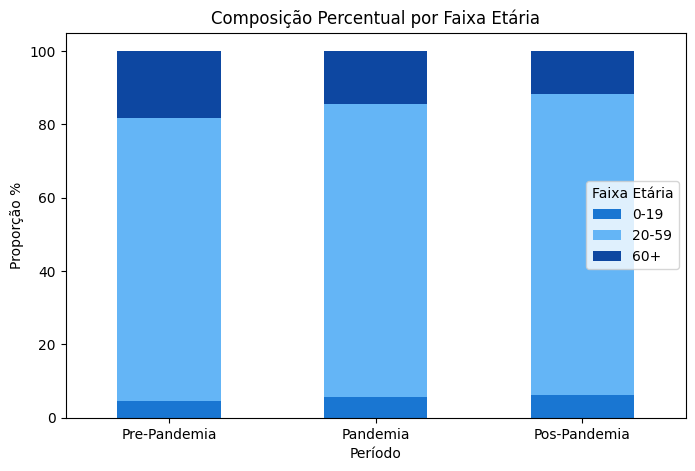

In [ ]:
cores_azul = ['#1976d2', '#64b5f6', '#0d47a1']

proporcao_faixa_periodo.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=cores_azul
)

plt.title('Composição Percentual por Faixa Etária')
plt.ylabel('Proporção %')
plt.xlabel('Período')
plt.xticks(rotation=0)
plt.legend(title='Faixa Etária')
plt.show()


### **1.4.2. Distribuição Por Sexo**

In [ ]:
df_tratado['SEXO'] = df_tratado['SEXO'].replace({
    '1': 'Masculino',
    '3': 'Feminino'
})

In [ ]:
tabela_sexo_periodo = (
    df_tratado
    .groupby(['periodo', 'SEXO'])
    .size()
    .unstack(fill_value=0)
    .reindex(['Pre-Pandemia','Pandemia','Pos-Pandemia'])
)

tabela_sexo_periodo



/tmp/ipython-input-334592215.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'SEXO'])


SEXO,Feminino,Masculino
periodo,,
Pre-Pandemia,261135,430974
Pandemia,91707,146925
Pos-Pandemia,71602,110590


In [ ]:
proporcao_sexo = (
    tabela_sexo_periodo
    .div(tabela_sexo_periodo.sum(axis=1), axis=0)
    * 100
)

proporcao_sexo


SEXO,Feminino,Masculino
periodo,,
Pre-Pandemia,37.730329,62.269671
Pandemia,38.430303,61.569697
Pos-Pandemia,39.300299,60.699701


/tmp/ipython-input-4210965697.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'SEXO'])


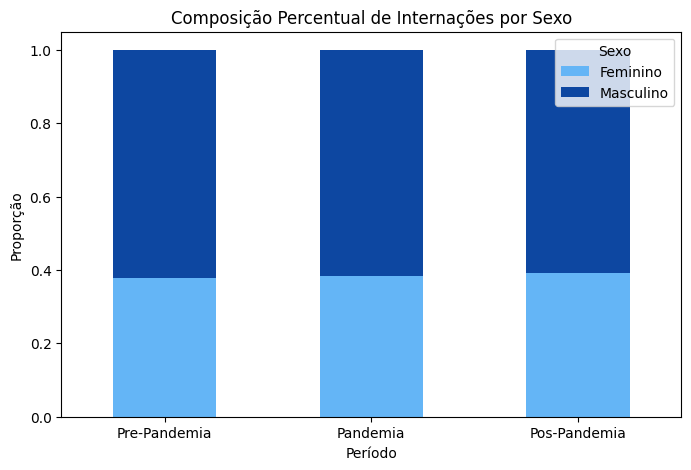

In [ ]:
proporcao_sexo = (
    df_tratado
    .groupby(['periodo', 'SEXO'])
    .size()
    .unstack(fill_value=0)
    .reindex(['Pre-Pandemia','Pandemia','Pos-Pandemia'])
)

proporcao_sexo = proporcao_sexo.div(proporcao_sexo.sum(axis=1), axis=0)

cores_azul = ['#64b5f6', '#0d47a1']  # azul médio e azul escuro

proporcao_sexo.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=cores_azul
)

plt.title('Composição Percentual de Internações por Sexo')
plt.ylabel('Proporção')
plt.xlabel('Período')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.show()


### **1.4.3. Distribuição de Raça/Cor**

**Análise Inicial**

A população branca continua sendo a maioria em todos os períodos (cerca de 55%), com pouca variação. Durante a pandemia e principalmente no pós-pandemia, há um aumento relevante na proporção de pessoas pretas, passando de ~21% para mais de 34%, isso é uma mudança expressiva. A categoria “Ignorado” cai drasticamente no pós-pandemia, o que pode indicar melhoria no preenchimento dos dados (e isso pode ter influenciado o aumento proporcional em outras categorias). Ou seja, diferente de sexo e idade, aqui há uma alteração mais visível na composição, que merece análise mais crítica antes de tirar conclusões definitivas.

In [ ]:
df_tratado['RACA_COR'] = df_tratado['RACA_COR'].replace({
    '01': 'Branca',
    '02': 'Parda',
    '03': 'Preta',
    '04': 'Amarela',
    '05': 'Indigena',
    '99': 'Ignorado'
})

In [ ]:
tabela_raca_periodo = (
    df_tratado
    .groupby(['periodo', 'RACA_COR'])
    .size()
    .unstack(fill_value=0)
    .reindex(['Pre-Pandemia','Pandemia','Pos-Pandemia'])
)

tabela_raca_periodo


/tmp/ipython-input-1742458124.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'RACA_COR'])


RACA_COR,Amarela,Branca,Ignorado,Indigena,Parda,Preta
periodo,,,,,,
Pre-Pandemia,3298,381099,99652,15,60331,147714
Pandemia,1215,127810,25093,14,21823,62677
Pos-Pandemia,1094,100951,845,30,16966,62306


In [ ]:
proporcao_raca = (
    tabela_raca_periodo
    .div(tabela_raca_periodo.sum(axis=1), axis=0)
    * 100
)

proporcao_raca


RACA_COR,Amarela,Branca,Ignorado,Indigena,Parda,Preta
periodo,,,,,,
Pre-Pandemia,0.476515,55.063437,14.398310,0.002167,8.716980,21.342592
Pandemia,0.509152,53.559456,10.515354,0.005867,9.145043,26.265128
Pos-Pandemia,0.600465,55.409129,0.463796,0.016466,9.312154,34.197989


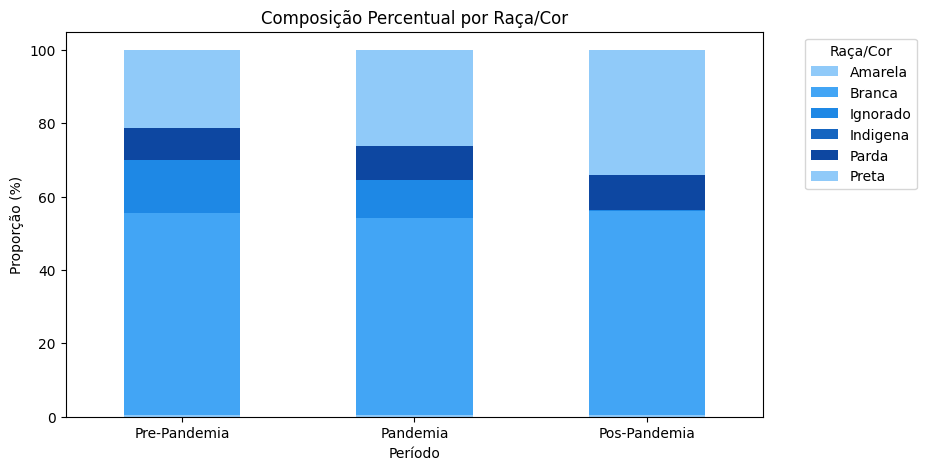

In [ ]:
cores_azul = ['#90caf9','#42a5f5','#1e88e5','#1565c0','#0d47a1']

proporcao_raca.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5),
    color=cores_azul
)

plt.title('Composição Percentual por Raça/Cor')
plt.ylabel('Proporção (%)')
plt.xlabel('Período')
plt.xticks(rotation=0)
plt.legend(title='Raça/Cor', bbox_to_anchor=(1.05,1))
plt.show()


## **1.5. Diagnóstico**

### **1.5.1. Top 10 Diagnóstico Por Período**

**Análise Inicial**

Houve uma queda perceptível no número de internações, o que reforça a ideia de que o volume despencou na pandemia, não foi um CID específico.

No pré-pandemia, o F200 (esquizofrenia) e o F192 (uso de múltiplas drogas) lideram com folga.
Na pandemia, todos caem muito — principalmente F068, F205 e F721 — sugerindo redução de internações eletivas ou maior barreira de acesso. No pós-pandemia, alguns diagnósticos ligados a uso de substâncias (F192, F102, F142) se mantêm relativamente altos comparados a outros, enquanto transtornos como F200 não retomam o patamar anterior. Ou seja, além da queda geral, pode estar havendo uma mudança no perfil clínico das internações, com maior peso relativo dos transtornos relacionados a substâncias no período mais recente.

In [ ]:
# Top 10 geral
top10_geral = (
    df_tratado['DIAG_PRINC']
    .value_counts()
    .head(10)
    .index
)

# Filtrar só eles
top10_periodo = (
    df_tratado[df_tratado['DIAG_PRINC'].isin(top10_geral)]
    .groupby(['periodo','DIAG_PRINC'])
    .size()
    .unstack(fill_value=0)
)

top10_periodo


/tmp/ipython-input-747006990.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo','DIAG_PRINC'])


DIAG_PRINC,F068,F102,F142,F192,F200,F205,F208,F29,F312,F721
periodo,,,,,,,,,,
Pre-Pandemia,19123,50248,13448,61826,117940,44798,14210,45462,27724,16549
Pandemia,3688,17629,5688,26998,30853,6272,4712,16275,12527,3383
Pos-Pandemia,1607,10933,5973,31701,18986,1829,3240,11398,10085,1485


/tmp/ipython-input-1887481768.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['DIAG_PRINC','periodo'])


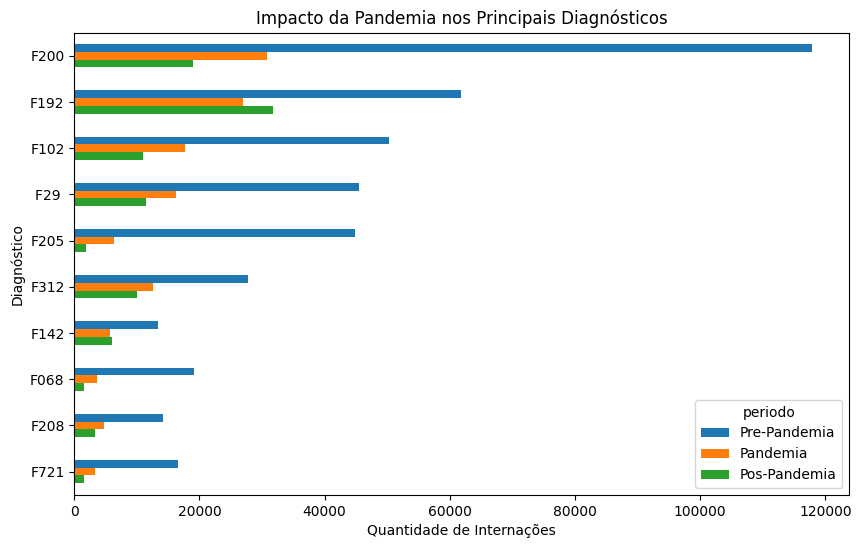

In [ ]:
# Top 10 geral (base comum de comparação)
top10 = (
    df_tratado['DIAG_PRINC']
    .value_counts()
    .head(10)
    .index
)

# Monta tabela cruzando diagnóstico x período
tabela = (
    df_tratado[df_tratado['DIAG_PRINC'].isin(top10)]
    .groupby(['DIAG_PRINC','periodo'])
    .size()
    .unstack(fill_value=0)
    .reindex(top10)
)

# Plot
tabela.plot(kind='barh', figsize=(10,6))

plt.title('Impacto da Pandemia nos Principais Diagnósticos')
plt.xlabel('Quantidade de Internações')
plt.ylabel('Diagnóstico')
plt.gca().invert_yaxis()
plt.show()


## **1.6. Análise Geográfica**

### **1.6.1. Fluxo de Origem-Destino**

**Análise Inicial**

A taxa de evasão permanece muito estável entre pré-pandemia e pandemia (cerca de 39%). Isso sugere que, apesar da queda no volume de internações, o padrão de deslocamento entre municípios praticamente não mudou no auge da pandemia. No pós-pandemia, há um leve aumento para ~40,8%, indicando pequena intensificação da dependência externa. Ou seja, a pandemia impactou o volume total, mas não alterou de forma significativa a lógica estrutural da evasão: o sistema já era dependente antes e continuou sendo depois.

In [ ]:
df_tratado['evasao'] = df_tratado['MUNIC_RES'] != df_tratado['MUNIC_MOV']

taxa_mensal = (
    df_tratado
    .groupby(['periodo','ANO_CMPT','MES_CMPT'])['evasao']
    .mean()
)

taxa_evasao_periodo = (
    taxa_mensal
    .groupby(level=0)
    .mean()
    * 100
)

print(taxa_evasao_periodo)


periodo
Pre-Pandemia    39.605505
Pandemia        39.162587
Pos-Pandemia    40.781467
Name: evasao, dtype: float64


/tmp/ipython-input-3432784453.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo','ANO_CMPT','MES_CMPT'])['evasao']
/tmp/ipython-input-3432784453.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0)


### **1.6.2. Município de Residência vs Internação**

Análise Inicial

In [ ]:
# Dicionário de substituição

# Substituindo MUNIC_RES
df_tratado['MUNIC_RES'] = df_tratado['MUNIC_RES'].astype(str).replace({
    '355030': 'São Paulo',
    '352260': 'Itapira',
    '353070': 'Mogi Guaçu',
    '350600': 'Bauru',
    '352530': 'Jaú',
    '353870': 'Piracicaba',
    '354390': 'Rio Claro',
    '353080': 'Mogi Mirim',
    '351640': 'Franco da Rocha',
    '354530': 'Salto de Pirapora',
    '355220': 'Sorocaba',
    '351518': 'Espírito Santo do Pinhal',
    '354910': 'São João da Boa Vista',
    '355500': 'Tupã',
    '351630': 'Francisco Morato',
    '351670': 'Garça',
    '352900': 'Marília',
    '350760': 'Bragança Paulista',
    '350190': 'Amparo',
    '351280': 'Cosmópolis',
    '354140': 'Presidente Prudente',
    '354340': 'Ribeirão Preto',
    '351110': 'Catanduva',
    '350010': 'Adamantina'

})

# Substituindo MUNIC_MOV
df_tratado['MUNIC_MOV'] = df_tratado['MUNIC_MOV'].astype(str).replace({
    '355030': 'São Paulo',
    '352260': 'Itapira',
    '353070': 'Mogi Guaçu',
    '350600': 'Bauru',
    '352530': 'Jaú',
    '353870': 'Piracicaba',
    '354390': 'Rio Claro',
    '353080': 'Mogi Mirim',
    '351640': 'Franco da Rocha',
    '354530': 'Salto de Pirapora',
    '355220': 'Sorocaba',
    '351518': 'Espírito Santo do Pinhal',
    '354910': 'São João da Boa Vista',
    '355500': 'Tupã',
    '351630': 'Francisco Morato',
    '351670': 'Garça',
    '352900': 'Marília',
    '350760': 'Bragança Paulista',
    '350190': 'Amparo',
    '351280': 'Cosmópolis',
    '354140': 'Presidente Prudente',
    '354340': 'Ribeirão Preto',
    '351110': 'Catanduva',
    '350010': 'Adamantina'
})


# Criando a tabela de frequência de Origem -> Destino por período
fluxo_municipios = (
    df_tratado
    .groupby(['periodo', 'MUNIC_RES', 'MUNIC_MOV'])
    .size()
    .reset_index(name='quantidade')
    .sort_values(['periodo', 'quantidade'], ascending=[True, False])
)

# Filtrando apenas internações fora do município de residência
evasao_municipios = fluxo_municipios[
    fluxo_municipios['MUNIC_RES'] != fluxo_municipios['MUNIC_MOV']
]

print("Top 10 Maiores Fluxos de Evasão por Período")
print(evasao_municipios.groupby('periodo').head(10))


/tmp/ipython-input-3411037487.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'MUNIC_RES', 'MUNIC_MOV'])


Top 10 Maiores Fluxos de Evasão por Período
              periodo              MUNIC_RES                 MUNIC_MOV  \
414904   Pre-Pandemia              São Paulo                   Itapira   
411907   Pre-Pandemia             Mogi Guaçu                   Itapira   
408245   Pre-Pandemia                  Bauru                       Jaú   
412581   Pre-Pandemia             Piracicaba                 Rio Claro   
412240   Pre-Pandemia             Mogi Mirim                   Itapira   
410251   Pre-Pandemia        Franco da Rocha         Salto de Pirapora   
414914   Pre-Pandemia              São Paulo                  Sorocaba   
411903   Pre-Pandemia             Mogi Guaçu  Espírito Santo do Pinhal   
414567   Pre-Pandemia  São João da Boa Vista  Espírito Santo do Pinhal   
414571   Pre-Pandemia  São João da Boa Vista                   Itapira   
830155       Pandemia              São Paulo                   Itapira   
829818       Pandemia  São João da Boa Vista  Espírito Santo do Pinh

/tmp/ipython-input-3411037487.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(evasao_municipios.groupby('periodo').head(10))


In [ ]:
evasao_municipios[evasao_municipios['periodo'] == 'Pandemia']


,periodo,MUNIC_RES,MUNIC_MOV,quantidade
830155,Pandemia,São Paulo,Itapira,3050
829818,Pandemia,São João da Boa Vista,Espírito Santo do Pinhal,1621
827158,Pandemia,Mogi Guaçu,Itapira,1527
823496,Pandemia,Bauru,Jaú,1499
827832,Pandemia,Piracicaba,Rio Claro,1133
...,...,...,...,...
830495,Pandemia,Tupã,Ribeirão Preto,0
830496,Pandemia,Tupã,Rio Claro,0
830497,Pandemia,Tupã,Salto de Pirapora,0
830498,Pandemia,Tupã,Sorocaba,0


### **1.6.3. Top 10 Cidades que mais recebem pacientes de outros municípios**

**Análise Inicial**

Os dados mostram que Itapira se mantém como o hub mais importante em todos os períodos, recebendo muito mais pacientes que os demais municípios, o que evidencia sua centralidade no atendimento. Outros polos como Presidente Prudente, Espírito Santo do Pinhal e Amparo também se destacam, mas com números significativamente menores. Durante a pandemia, houve uma redução geral no número de pacientes recebidos, refletindo tanto a menor mobilidade quanto possíveis restrições de atendimento. No período pós-pandemia, os fluxos começam a se recuperar, mas ainda não atingem os níveis pré-pandemia, indicando uma retomada gradual. Esses hubs confirmam a concentração de serviços em alguns municípios, reforçando a necessidade de ampliar a cobertura local para reduzir deslocamentos.

In [ ]:
# 1. Filtra apenas evasão
df_fora = df_tratado[df_tratado['MUNIC_RES'] != df_tratado['MUNIC_MOV']]

# 2. Conta quem mais recebeu por período
hubs_hospitalares = (
    df_fora
    .groupby(['periodo', 'MUNIC_MOV'])
    .size()
    .reset_index(name='pacientes_recebidos')
    .sort_values(['periodo', 'pacientes_recebidos'], ascending=[True, False])
)

print("Top 10 Hubs por período:")
print(hubs_hospitalares.groupby('periodo').head(10))


Top 10 Hubs por período:
          periodo                 MUNIC_MOV  pacientes_recebidos
228  Pre-Pandemia                   Itapira                37036
234  Pre-Pandemia       Presidente Prudente                15427
224  Pre-Pandemia  Espírito Santo do Pinhal                15285
238  Pre-Pandemia                  Sorocaba                15180
219  Pre-Pandemia                    Amparo                14216
229  Pre-Pandemia                       Jaú                12698
240  Pre-Pandemia                 São Paulo                10823
237  Pre-Pandemia         Salto de Pirapora                 9691
235  Pre-Pandemia            Ribeirão Preto                 9547
236  Pre-Pandemia                 Rio Claro                 9435
470      Pandemia                   Itapira                13384
461      Pandemia                    Amparo                 7347
466      Pandemia  Espírito Santo do Pinhal                 6172
476      Pandemia       Presidente Prudente                 5118


/tmp/ipython-input-2609042390.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'MUNIC_MOV'])
/tmp/ipython-input-2609042390.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hubs_hospitalares.groupby('periodo').head(10))


## **1.7 Óbito**

### **1.7.1. Taxa Média de Óbito Por Ano**

**Análise Inicial**

In [ ]:
# 1. Garantir que MORTE é numérico
df_tratado['MORTE'] = pd.to_numeric(df_tratado['MORTE'], errors='coerce')

# 2. Calcular taxa por ano
taxa_obito_ano = (
    df_tratado
    .groupby(['periodo', 'ANO_CMPT'])['MORTE']
    .mean()
    .reset_index()
)

# 3. Média das taxas anuais dentro de cada período
taxa_obito_periodo = (
    taxa_obito_ano
    .groupby('periodo')['MORTE']
    .mean()
    .reset_index()
)

# Converter para %
taxa_obito_periodo['Taxa_Obito'] = taxa_obito_periodo['MORTE'] * 100
taxa_obito_periodo = taxa_obito_periodo.drop(columns='MORTE')

print(taxa_obito_periodo)


        periodo  Taxa_Obito
0  Pre-Pandemia    0.284414
1      Pandemia    0.304469
2  Pos-Pandemia    0.296611


/tmp/ipython-input-1004194583.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'ANO_CMPT'])['MORTE']
/tmp/ipython-input-1004194583.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('periodo')['MORTE']


/tmp/ipython-input-4033033168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


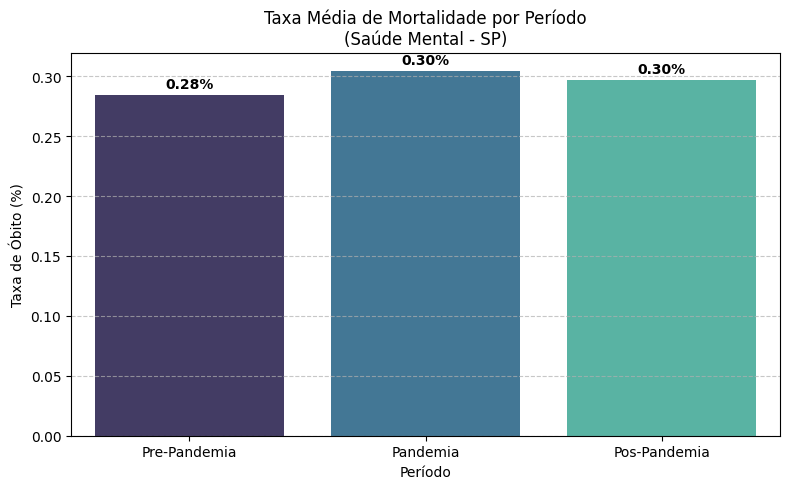

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=taxa_obito_periodo,
    x='periodo',
    y='Taxa_Obito',
    palette='mako'
)

plt.title('Taxa Média de Mortalidade por Período\n(Saúde Mental - SP)')
plt.ylabel('Taxa de Óbito (%)')
plt.xlabel('Período')

for i, v in enumerate(taxa_obito_periodo['Taxa_Obito']):
    plt.text(i, v + (v * 0.02), f'{v:.2f}%', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **1.7.2. Taxa de Óbito Por Idade**

**Análise Inicial**

O gráfico mostra que a taxa média de óbito em saúde mental aumentou significativamente na faixa etária 60+ durante a pandemia e pós-pandemia, chegando a 1,23%. Nas faixas mais jovens, 0-19 e 20-59, as variações foram pequenas, com ligeira queda ou estabilidade no pós-pandemia. Isso indica que o impacto da pandemia foi mais severo entre os idosos, possivelmente devido à maior vulnerabilidade e menor acesso a cuidados adequados de saúde mental nesse período.

/tmp/ipython-input-4137254471.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'faixa_etaria'])['MORTE']


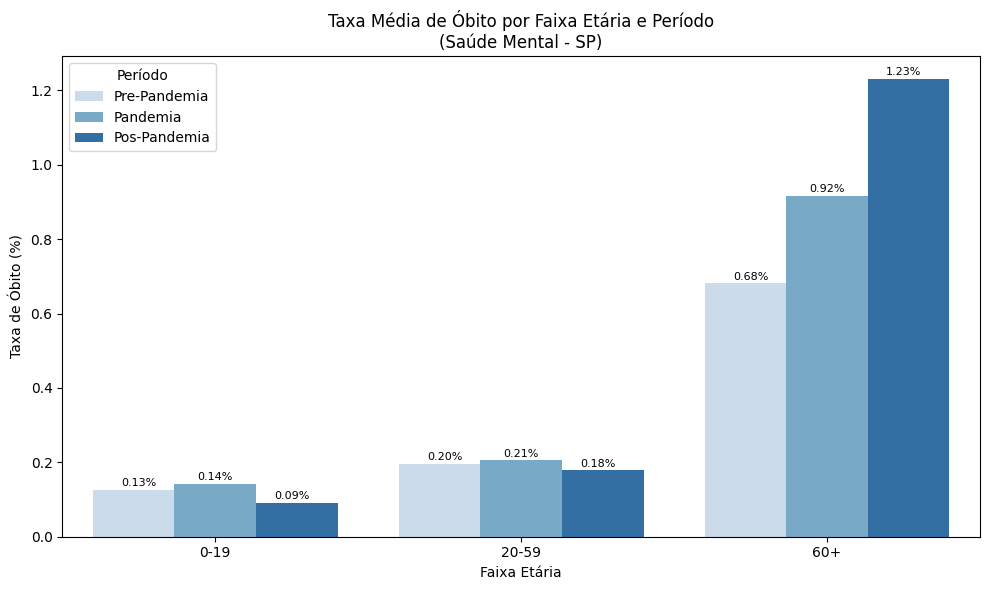

In [ ]:
# Garantir que MORTE é numérico
df_tratado['MORTE'] = pd.to_numeric(df_tratado['MORTE'], errors='coerce')

# 1. Taxa por período e faixa etária
taxa_periodo_faixa = (
    df_tratado
    .groupby(['periodo', 'faixa_etaria'])['MORTE']
    .mean()
    .reset_index()
)

# 2. Multiplicar por 100 para ficar em porcentagem
taxa_periodo_faixa['Taxa_Obito'] = taxa_periodo_faixa['MORTE'] * 100

# 3. Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=taxa_periodo_faixa,
    x='faixa_etaria',
    y='Taxa_Obito',
    hue='periodo',
    palette='Blues'
)

plt.title('Taxa Média de Óbito por Faixa Etária e Período\n(Saúde Mental - SP)')
plt.ylabel('Taxa de Óbito (%)')
plt.xlabel('Faixa Etária')
plt.legend(title='Período')

# Adicionar os valores acima das barras
for i, row in taxa_periodo_faixa.iterrows():
    plt.text(
        x=list(taxa_periodo_faixa['faixa_etaria']).index(row['faixa_etaria']) +
          (-0.25 if row['periodo'] == 'Pre-Pandemia' else (0 if row['periodo'] == 'Pandemia' else 0.25)),
        y=row['Taxa_Obito'] + 0.01,
        s=f"{row['Taxa_Obito']:.2f}%",
        fontsize=8,
        ha='center'
    )

plt.tight_layout()
plt.show()


### **1.7.3. Taxa de Óbito Por Sexo**

**Análise Inicial**

O gráfico mostra que a taxa média de óbito por sexo aumentou durante a pandemia, com os homens apresentando consistentemente taxas mais altas que as mulheres. No período pré-pandemia, a diferença entre sexos era menor, mas durante a pandemia ela se acentuou. No pós-pandemia, observa-se uma leve redução para os homens, enquanto para as mulheres há um aumento discreto. Isso sugere que a pandemia teve impacto mais significativo nos óbitos masculinos em saúde mental. Em geral, os dados indicam a importância de políticas direcionadas de prevenção, considerando diferenças de sexo.

/tmp/ipython-input-1577521643.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'SEXO'])['MORTE']


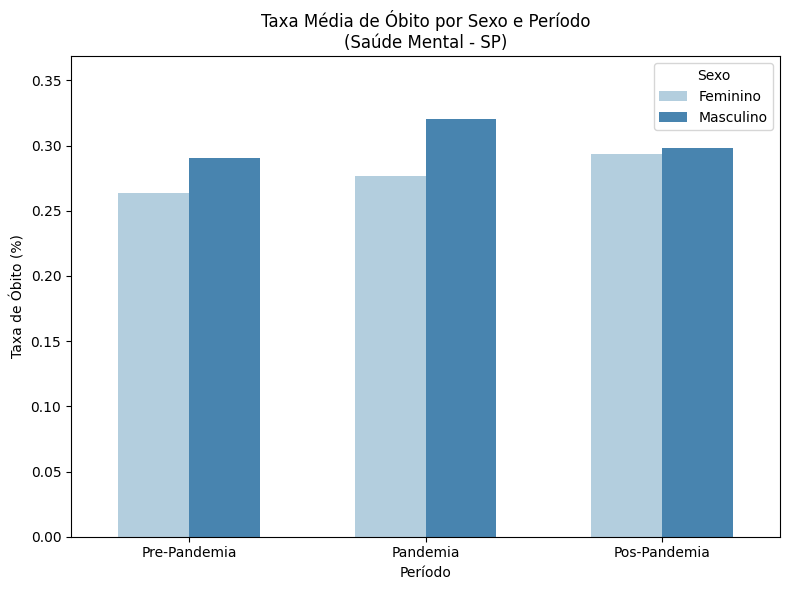

In [ ]:
df_tratado['MORTE'] = pd.to_numeric(df_tratado['MORTE'], errors='coerce')

taxa_periodo_sexo = (
    df_tratado
    .groupby(['periodo', 'SEXO'])['MORTE']
    .mean()
    .reset_index()
)

taxa_obito_periodo = (
    taxa_periodo_sexo
    .copy()  # já tá agrupado por período e sexo
)

taxa_obito_periodo['Taxa_Obito'] = taxa_obito_periodo['MORTE'] * 100

plt.figure(figsize=(8, 6))

sns.barplot(
    data=taxa_obito_periodo,
    x='periodo',
    y='Taxa_Obito',
    hue='SEXO',
    palette='Blues',
    width=0.6
)

plt.title('Taxa Média de Óbito por Sexo e Período\n(Saúde Mental - SP)')
plt.ylabel('Taxa de Óbito (%)')
plt.xlabel('Período')
plt.ylim(0, taxa_obito_periodo['Taxa_Obito'].max() * 1.15)

plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


### **1.7.4. Taxa de Óbito por Raça/Cor**

**Análise Inicial**

Observando o gráfico, nota-se que a taxa de óbito variou bastante entre os períodos e raças/cores. A população amarela apresentou aumento expressivo durante a pandemia, mas reduziu no pós-pandemia. Pessoas de raça ignorada tiveram pico no pós-pandemia, atingindo a maior taxa do período analisado. As raças preta e parda mantiveram taxas relativamente estáveis, com leve aumento na pandemia. Esses padrões sugerem desigualdades no impacto da pandemia sobre diferentes grupos raciais.

/tmp/ipython-input-4101757774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'ANO_CMPT', 'RACA_COR'])['MORTE']
/tmp/ipython-input-4101757774.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['periodo', 'RACA_COR'])['MORTE']


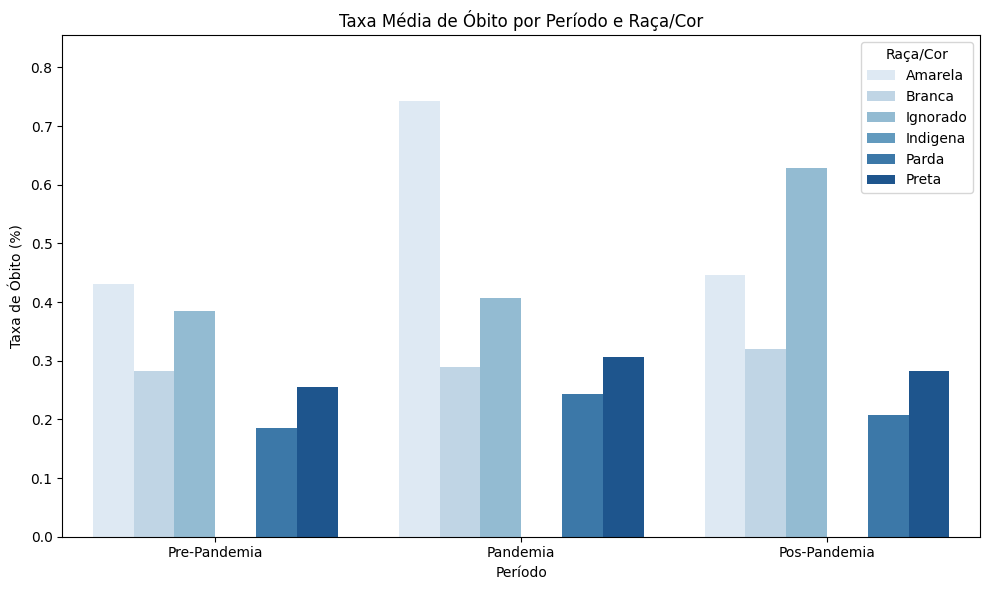

In [ ]:
taxa_ano_raca = ( df_tratado
                 .groupby(['periodo', 'ANO_CMPT', 'RACA_COR'])['MORTE']
                  .mean()
                  .reset_index() )

taxa_periodo_raca = ( taxa_ano_raca
                     .groupby(['periodo', 'RACA_COR'])['MORTE']
                      .mean()
                      .reset_index() )

taxa_periodo_raca['Taxa_Obito'] = taxa_periodo_raca['MORTE'] * 100

plt.figure(figsize=(10, 6))

sns.barplot(
    data=taxa_periodo_raca,
    x='periodo',       # agora cada período é uma barra
    y='Taxa_Obito',
    hue='RACA_COR',    # cor da barra = raça/cor
    palette='Blues'
)

plt.title('Taxa Média de Óbito por Período e Raça/Cor')
plt.ylabel('Taxa de Óbito (%)')
plt.xlabel('Período')
plt.ylim(0, taxa_periodo_raca['Taxa_Obito'].max() * 1.15)

plt.legend(title='Raça/Cor')
plt.tight_layout()
plt.show()
